In [22]:
# Data manipulation tools
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Dataset
import sklearn.linear_model
from sklearn.datasets import load_iris

In [23]:
iris = load_iris()

In [24]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [25]:
# Get the variables and target species
X = iris.data
Y = iris.target

In [26]:
# Put the information into DataFrames to manipulate
iris_data = DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_target = DataFrame(Y, columns=['Species'])

In [27]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [28]:
# Species is in numbers, we want to apply a formula that converts this into the species names
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'
    
iris_target['Species'] = iris_target['Species'].apply(flower)
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [29]:
# Combine the dataframes together
iris = pd.concat([iris_data, iris_target], axis=1)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


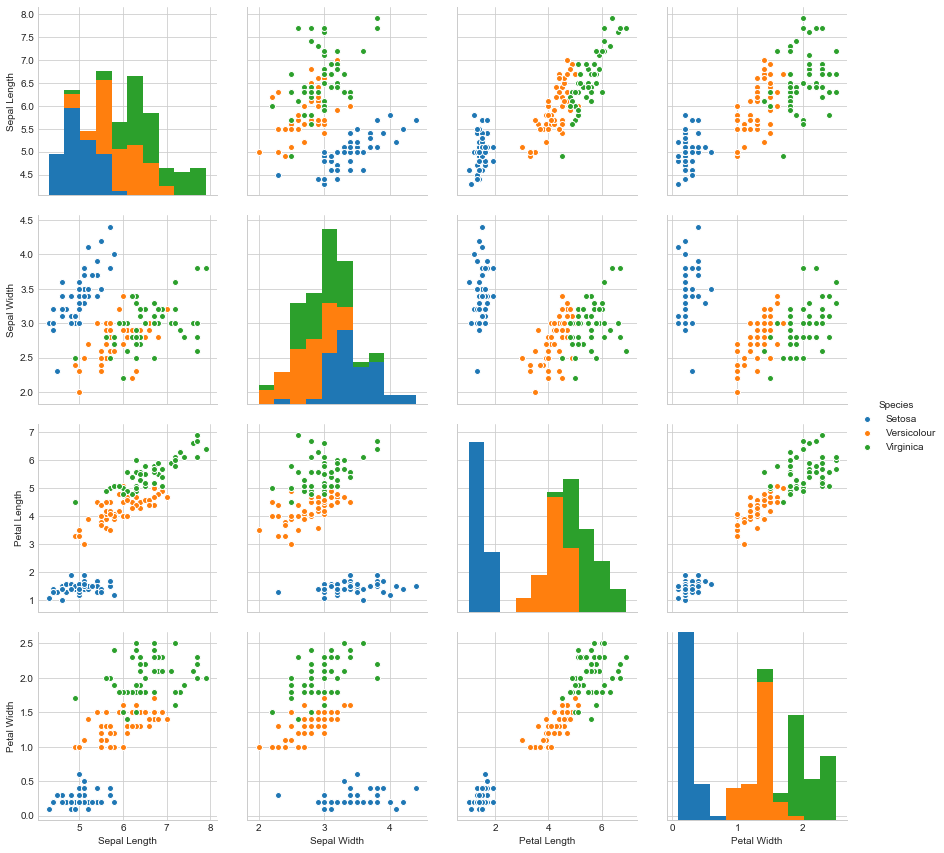

In [37]:
# Quick visualisation analysis on the data
sns.pairplot(iris, hue='Species', size=3)

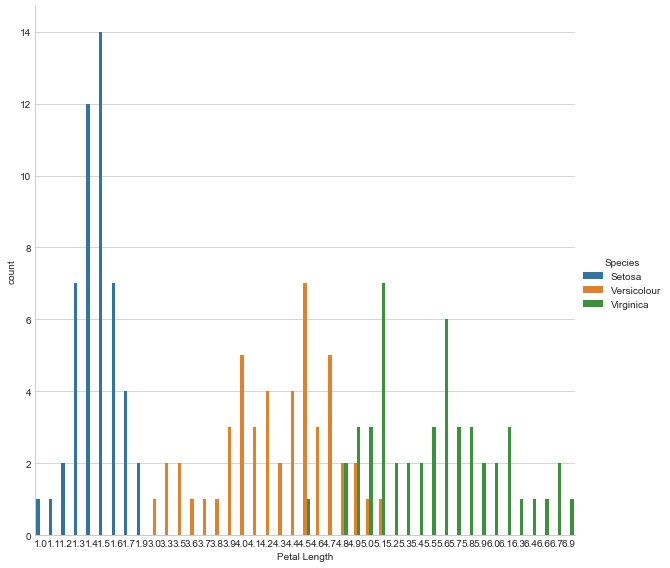

In [38]:
sns.factorplot('Petal Length', data=iris, hue='Species', size=8, kind='count')

In [39]:
# Import ML tools 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()

In [40]:
# Set up the testing and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=3)

# Fit the training data to the log model
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
# Import ML analysis tool metrics
from sklearn import metrics

In [43]:
# See how closely the Y prediction fits the Y test value
Y_pred = logreg.predict(X_test)
print (metrics.accuracy_score(Y_test, Y_pred))

0.9333333333333333


In [45]:
# Import knn tools
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)

In [46]:
# Fit knn to training data
knn.fit(X_train, Y_train)

# Get prediction from testing data and fitted knn model, then check accuracy
Y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

0.95


In [47]:
# Cycle through k-values from 1 to 20 and check the accuracy of each k-value
k_range = range(1,21)
accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))
    

Text(0.5,1,'Plot to show the accuracy of knn with each k-value')

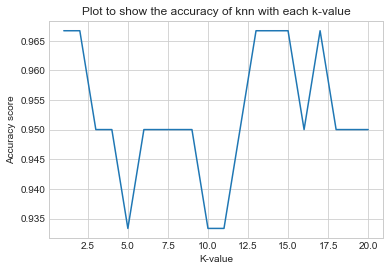

In [48]:
# Plot the accuracy of each k-value
plt.plot(k_range, accuracy)
plt.xlabel('K-value')
plt.ylabel('Accuracy score')
plt.title('Plot to show the accuracy of knn with each k-value')